In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Image Compression: JPEG

In this task, we will explore the effect of JPEG compression. You do not need to write the algorithm for JPEG compression. We will simply use the inbuilt `cv2.imwrite` function and will vary the Q value for JPEG compression. Note that here Q value is the quality.

To save the image at a quality = 50, use `cv2.imwrite('filename.jpeg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 50])`. 

Use the provided function `get_file_size()` to find the size of the file in KB. for eg: `get_file_size('filename.jpeg')`

### Your task
1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
3. Apply an average filter of 5 x 5 on original image >> save at Q = 80

After you do the above three operations on the original image. Compare the size of the saved image. Is there’s any change, Yes/ No? If Yes, try to explain why? Write your explanation in your observations.

In [1]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-rp1yk0wn
  Created wheel for ee604-plugins: filename=ee604_plugins-0.4.2-cp36-none-any.whl size=2457 sha256=5aae27cd6fadc4e378e7e54f1d09fd3d2ba1e34c4efa5bcef4c526015a1b5200
  Stored in directory: /tmp/pip-ephem-wheel-cache-0o2y24hq/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-rp1yk0wn


In [2]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage

def get_file_size(file_dir):
    b = os.path.getsize(file_dir)
    return round(b/1000, 1)

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=4, task_no=1) # download data for this assignment

Download Complete!


In [3]:
def jpeg_playground(img):
    '''
    Inside this function do the task as described above, i.e.
      1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
      2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
      3. Apply an average filter of 5 x 5 on original image >> save at Q = 80
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + Orig_img - Original image after compressing at Q = 80
    + Orig_size - Size of the saved image of Orig_img at Q = 80
    
    + UD_img - Image obtained after upsampling and downsampling
    + UD_size - Size of the saved image of UD_img at Q = 80
    
    + DU_img - Image obtained after downsampling and upsampling
    + DU_size - Size of the saved image of DU_img at Q = 80
    
    + Smooth_img - Image obtained after smoothing using average filter
    + Smooth_size - Size of the saved image of Smooth_img at Q = 80
    
    Allowed external package:
    + Any relevant module in openCV
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    H, W = img.shape

    cv2.imwrite('Orig_img.jpeg', img.copy(), [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Orig_img = cv2.imread('Orig_img.jpeg', 0)
    Orig_size = get_file_size('Orig_img.jpeg')

    # Upsample and Downsample
    UD_img = cv2.resize(cv2.resize(img.copy(), (2*W, 2*H), cv2.INTER_CUBIC), (W,H), cv2.INTER_CUBIC)
    cv2.imwrite('UD_img.jpeg', UD_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    UD_size = get_file_size('UD_img.jpeg')

    # Downsample and Upsample
    DU_img = cv2.resize(cv2.resize(img.copy(), (W//2, H//2), cv2.INTER_CUBIC), (W,H), cv2.INTER_CUBIC)
    cv2.imwrite('DU_img.jpeg', DU_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    DU_size = get_file_size('DU_img.jpeg')

    # Average smoothed image
    Smooth_img = cv2.blur(img.copy(), (5,5))
    cv2.imwrite('Smooth_img.jpeg', Smooth_img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Smooth_size = get_file_size('Smooth_img.jpeg')
    
    #############################
    # End your code here ########
    #############################   
    
    return Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size

### Observations

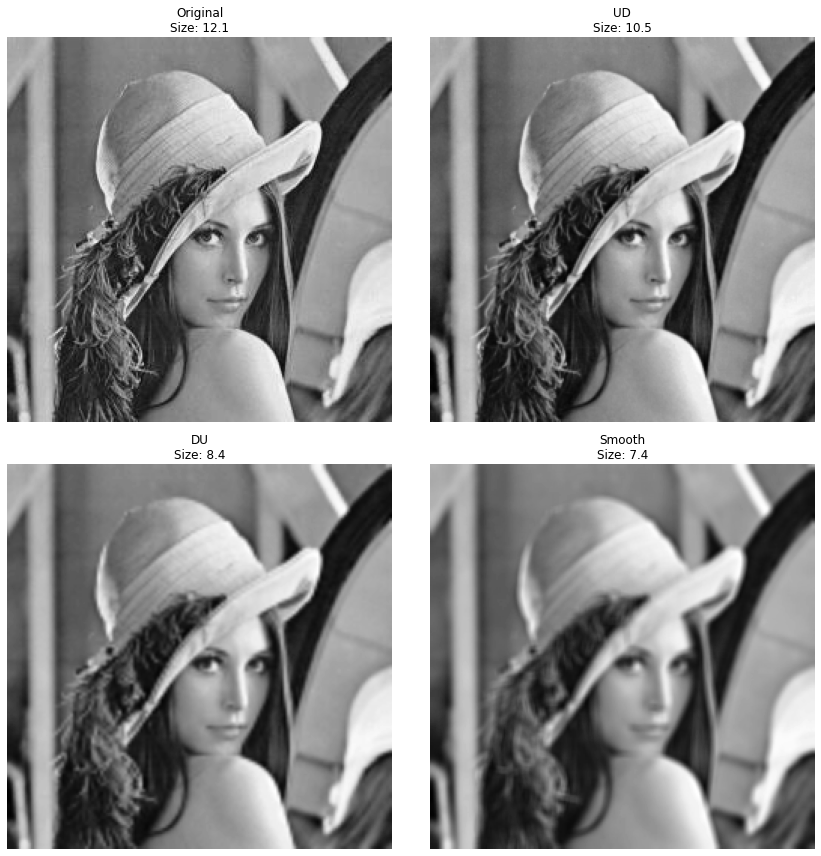

In [4]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the images vs the size of the jpeg compression on different operations

img = cv2.imread("data/lena_gray.jpg", 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)

Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size = jpeg_playground(img)

fig = plt.figure(figsize=(12, 12))
plot_frame(2, 2, 0, Orig_img, "Original\nSize: " + str(Orig_size))
plot_frame(2, 2, 1, UD_img, "UD\nSize: " + str(UD_size))
plot_frame(2, 2, 2, DU_img, "DU\nSize: " + str(DU_size))
plot_frame(2, 2, 3, Smooth_img, "Smooth\nSize: " + str(Smooth_size))
fig.tight_layout()
plt.show()

In [5]:
your_observation = """
1. The above pictures shows that as we apply the image resizing and smoothing operations, applying JPEG compression reduces the image size.
2. We also see a decrease in the quality of image 
"""

print(your_observation)


1. The above pictures shows that as we apply the image resizing and smoothing operations, applying JPEG compression reduces the image size.
2. We also see a decrease in the quality of image 

